# 데이터 전처리
- NaN,Null과 같은 결손값은 허용되지 않음<- feature의 평균값으로 대체하기 or 해당 feature를 드롭하기(Null값이 대부분이라면)
- 문자열->숫자형으로 변환하기

## 데이터 인코딩
1. 레이블 인코딩
: 카테고리를 숫자값으로
2. 원핫인코딩
: 고유값에 해당하는 col에만 1, 나머지는 0

## 피처 스케일링과 정규화
-  표준화: 평균 0 분산 1 의 정규분포로, 정규화: 서로 다른 feature의 크기 통일하기 위해 변환 모두 0-1로
-  StandardScaler: 표준화 지원해주는 클래스
-  MinMaxScaler: 정규화 지원해주는 클래스
> 이때 학습데이터로 fit이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야함
>> 1. 전체 데이터 스케일링 변환 후 학습용, 테스트용 분리
>> 2. 테스트 변환시에는 fit,fit_transform() 적용하지 않기

In [1]:
#레이블 인코딩
from sklearn.preprocessing import LabelEncoder
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
#label encoder를 객체로 생성한 후 fit, transform으로 레이블 인코딩 수행
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [2]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [3]:
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [5]:
#원핫인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#숫자값으로 변환을 위해 Label Encoding으로 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
#2차원 데이터로 변환
labels=labels.reshape(-1,1)
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원핫 인코딩 데이터')
print(oh_labels.toarray())
print('원핫 인코딩 데이터 차원')
print(oh_labels.shape)

원핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫 인코딩 데이터 차원
(8, 6)


In [7]:
#원핫인코딩을 더 쉽게 
import pandas as pd
df=pd.DataFrame({'items':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [8]:
#StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df.mean())
print('\n feature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

 feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler
#StandardScaler객체 생성
scaler=StandardScaler()
#StandardScaler로 데이터 세트 변환, 
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)
#transform()시 스케일이 변환된 데이터 세트가 numpy ndarray로 반환되어 이를 dataframe으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\n feature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

 feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [10]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler 객체 생성
scaler=MinMaxScaler()
#MinMaxScaler 데이터 세트 변환
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)
#transform()시 스케일 변환된 데이터 세트가 numpy ndarray로 반환되어 이를 dataframe으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\n feature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

 feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train array 데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train array 데이터:',np.round(train_scaled.reshape(-1),2))

원본 train array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [14]:
scaler.fit(test_array)
test_scaled=scaler.transform(test_array)
print('원본 test array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test array 데이터: [0 1 2 3 4 5]
Scale된 test array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [15]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train array 데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train array 데이터:',np.round(train_scaled.reshape(-1),2))
test_scaled=scaler.transform(test_array)
print('원본 test array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test array 데이터:',np.round(test_scaled.reshape(-1),2))

#fit 다시 하지 않기

원본 train array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test array 데이터: [0 1 2 3 4 5]
Scale된 test array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df=pd.read_csv("C:/Users/MYCOM/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
print("학습데이터 정보")
print(titanic_df.info())

학습데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
#Null값 변경하기
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 개수',titanic_df.isnull().sum())

데이터 세트 Null 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [21]:
print('\n ##Sex 값 분포## \n',titanic_df['Sex'].value_counts())
print('\n ##Cabin 값 분포## \n',titanic_df['Cabin'].value_counts())
print('\n ##Embarked 값 분포## \n',titanic_df['Embarked'].value_counts())


 ##Sex 값 분포## 
 male      577
female    314
Name: Sex, dtype: int64

 ##Cabin 값 분포## 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 ##Embarked 값 분포## 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [22]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [23]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

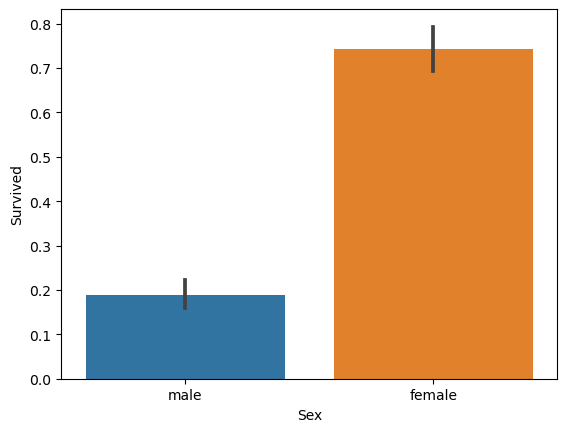

In [24]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

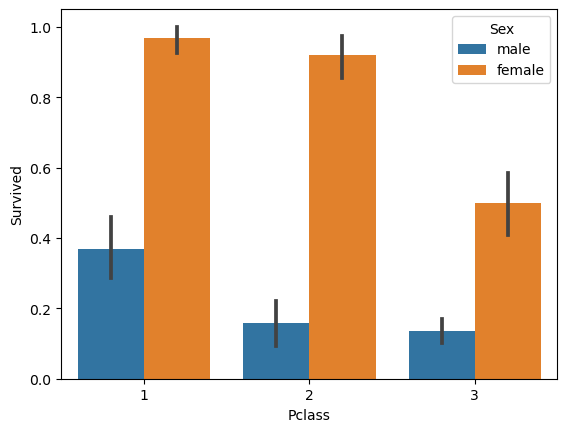

In [26]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

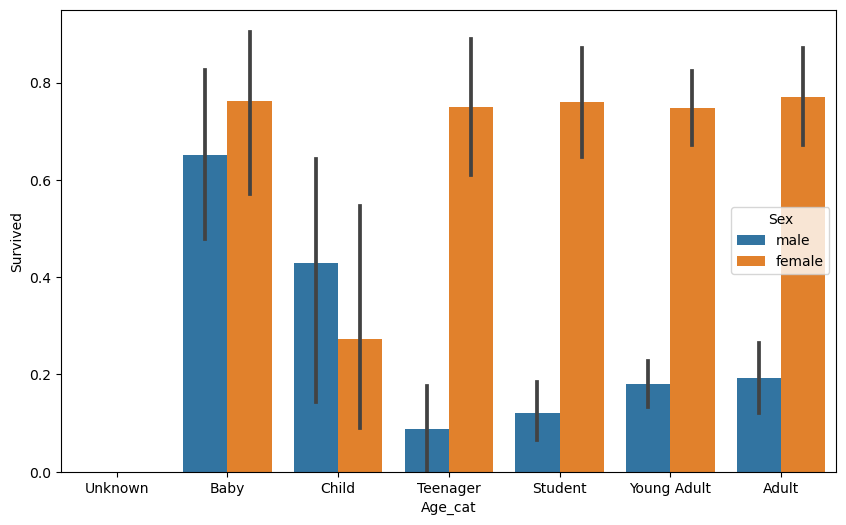

In [29]:
def get_cat(age):
    cat=''
    if age<= -1:cat='Unknown'
    elif age<=5:cat='Baby'
    elif age<=12:cat='Child'
    elif age<=18:cat='Teenager'
    elif age<=25:cat='Student'
    elif age<=35:cat='Young Adult'
    elif age<=60:cat='Adult'
    else: cat='Elderly'
    
    return cat


plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult']
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_cat(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [31]:
from sklearn import preprocessing
def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [34]:
##함수 한번에 만들기

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [35]:
# 원본 데이터 재로딩
titanic_df=pd.read_csv("C:/Users/MYCOM/titanic_train.csv")
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

# DecisonTreeClassifier 학습/ 예측/ 평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisonTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))
# RandomForestClassifier 학습/ 예측/ 평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))
# LogisticRegression 학습/ 예측/ 평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisonTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8492


C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.model_selection import KFold
def exec_kfold(clf,folds=5):
    # 폴드 세트 5개인 kfold 객체 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
    kfold=KFold(n_splits=folds)
    scores=[]
    # KFold 교차 검증 수행
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        # 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index생성
        X_train,X_test=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        #Classifier 학습/ 예측/ 정확도 계산
        clf.fit(X_train,y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print('교차 검증 {0}정확도:{1:.4f} '.format(iter_count,accuracy))
    
    # 5개 kfold에서 평균 정확도 계산
    mean=np.mean(scores)
    print('평균 정확도:{0:.4f}'.format(mean))
exec_kfold(dt_clf,folds=5)
        
        
        
        
        
        

교차 검증 0정확도:0.7542 
교차 검증 1정확도:0.7809 
교차 검증 2정확도:0.7865 
교차 검증 3정확도:0.7697 
교차 검증 4정확도:0.8202 
평균 정확도:0.7823


In [42]:
# 교차 검증 : cross_val_score
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도:{1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도:0.7430
교차 검증 1 정확도:0.7753
교차 검증 2 정확도:0.7921
교차 검증 3 정확도:0.7865
교차 검증 4 정확도:0.8427
평균 정확도:0.7879


In [44]:
from sklearn.model_selection import GridSearchCV


parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)
print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifer 정확도:{0:.4f}'.format(accuracy))




GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifer 정확도:0.8715
